# Tarea 3

#### Tópicos Selectos De Matemáticas Aplicadas II: Análisis de Datos con Python

Fecha de entrega: Domingo 22 de junio 

Alan Badillo Salas

**1.** Guarde en un Dataframe los datos de los precios de las acciones de Tesla (*TSLA.csv* en Github) y realice lo siguiente:

* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2020.

* Obtenga las gráficas de las series de tiempo de cada año utilizando subplots.

* Obtenga las gráficas de caja por mes de los precios de cierre del 2022. 

* ¿Los precios de cierre de todo el 2022 se distribuyen normalmente? Justifique su respuesta.

In [38]:
import pandas

tesla = pandas.read_csv("tesla.csv", index_col=0, parse_dates=True)

tesla.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334


In [39]:
tesla.sort_values(by="Close", ascending=False).head(1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-11-04,411.470001,414.496674,405.666656,409.970001,409.970001


In [40]:
tesla.sort_values(by="Close", ascending=True).head(1)

,Open,High,Low,Close,Adj Close
Date,,,,,
2020-03-18,25.933332,26.990667,23.367332,24.081333,24.081333


<Axes: xlabel='Date'>

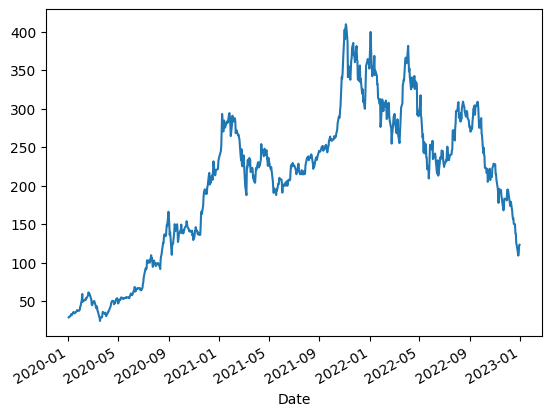

In [43]:
tesla["Close"].plot()

Close    Axes(0.125,0.11;0.775x0.77)
dtype: object

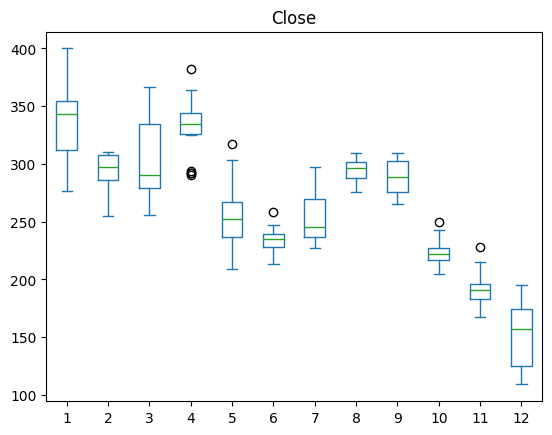

In [51]:
tesla["mes"] = tesla.index.map(lambda fecha: fecha.month)
tesla["anio"] = tesla.index.map(lambda fecha: fecha.year)

tesla[tesla["anio"] == 2022][["mes", "Close"]].plot.box("mes")

<Axes: ylabel='Frequency'>

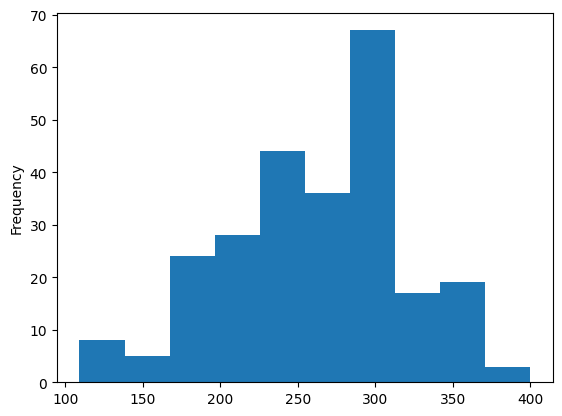

In [53]:
tesla[tesla["anio"] == 2022]["Close"].plot.hist()

In [57]:
tesla[tesla["anio"] == 2022][["Close"]].skew()

Close   -0.307273
dtype: float64

In [56]:
tesla[tesla["anio"] == 2022][["Close"]].kurt()

Close   -0.223269
dtype: float64

Los precios del $2022$ no parecen distribuirse de forma normal, tienen un ligero sesgo y curtosis negativa.

In [59]:
from scipy.stats import shapiro

r_value, p_value = shapiro(tesla[tesla["anio"] == 2022][["Close"]])

print(f"r-value: {r_value:.2f}")
print(f"p-value: {p_value:.2f}")

r-value: 0.99
p-value: 0.02


Vemos que el p-value es menor a $0.05$ lo que sugiere rechazar la hipótesis nula $H_0$ de que los datos se distribuyen de forma normal.

**2.** Guarde en un Dataframe los datos de los contaminantes principales de la zona centro de la CDMX durante el año 2021 (*rama2021.xlsx* en Github) y realice lo siguiente:

* Obtenga las gráficas de series de tiempo de los contaminantes.

* Obtenga los histogramas delos contaminantes.

* Obtenga un Dataframe con el resumen de 5 números, asimetría y kurtosis para todos los contaminantes.

* Obtenga los gráficos de caja de los contaminantes. ¿Cuál contaminante fué el que más detectado durante 2021?

* Realice una prueba de contraste de normalidad de los datos.

* De acuerdo a la prueba obtenida anteriormente. ¿Cuál es el coeficiente de correlación apropiado para obtener la correlación entre los contaminantes?

* Obtenga una matríz de correlación de los contaminantes y un mapa de calor. Además, obtenga un Dataframe que muestre la correlación 2 a 2 entre los contaminantes.

* Obtenga un diagrama de dispersión de los 2 contaminantes donde existe más correlación.

* Obtenga una gráfica que muestre todos los diagrama de dispersión entre todos los contaminantes.

* Compruebe si existe correlación entre los contaminantes y los factores meteorológicos contenidos en  *redmet_2021.csv* en Github.

* Escriba son sus conclusiones.

